# Проект "Исследование продаж игр по всему миру интернет-магазином "Стримчик"

## Описание проекта <a id='2'></a>

В данном исследовании будут проанализированы исторические данные `интернет-магазином "Стримчик"` о `продажах игр`, оценках пользователей и экспертов, жанрах и платформах. Данные представлены `до 2016 года`.

**Цель**: выявить ключевые факторы, влияющие на успешность игр, и определить зоны роста интернет-магазина "Стримчик" для развития будущих продаж.

**План работ**:
1) **[Описание проекта](#1)**
2) **[Обзор данных](#2)**
3) **[Предобработка данных](#3)**
4) **[Исследование данных](#4)**
5) **[Портрет пользователя каждого региона](#5)**
6) **[Проверка гипотез](#6)**
6) **[Вывод](#7)**

**Описание столбцов**:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Категории: EС - для детей младшего возраста, E - для всех возрастных категорий, E 10+ - Подходит для лиц старше 10 лет, T - подходит для лиц старше 13 лет, M - подходит для лиц старше 17 лет, AO - подходит для взрослых старше 18 лет, RP - категория ещё не присвоена

**Примечание**: Данные за 2016 год неполные.
***

## Обзор данных <a id='2'></a>

Импортируем `библиотеки`, которые будут использоваться в процессе исследования:

In [1]:
#importing libraries
import matplotlib.pyplot as plt
from scipy import stats as st 
import pandas as pd
from math import *
import numpy as np

Загрузим таблицу c данными и поместим её в переменную `games`:

In [2]:
#loading the dataframe
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

pd.set_option('display.max_columns', None)
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем общую информацию о таблице:

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.shape

(16715, 11)

In [5]:
games.duplicated().sum()

0

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**
- Данные включают `16715 строк` и `11 столбцов` и содержат информацию о продажа игр и их свойствах и оценках;
- В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` есть пропуски;
-  Названия столбцов не в нижнем регистре;
-  Данные столбца `User_Score` имеют тип `Object`, а не `Float64`;
-  Данные столбца `Year_of_Release` имеют тип `Float64`, а не `Int64`;
- Полных дубликатов нет.
</div>

## Предобработка данных <a id='3'></a>

### Наименование столбцов

Приведем названия столбцов к нижнему регистру:

In [6]:
games.columns = list(map(str.lower, games.columns))
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Посмотрим на пропуски в данных:

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
games[games.name.isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбцах `name` и `genre` есть 2 пропуска, причем это одни и те же строки. Удалим их из датасета. Наиболее вероятно, что данные пропуски обусловлены тем, что эти две игры очень старые и данные могли отсутствовать или затеряться.

В столбцах `year_of_release`, `critic_score`, `user_score`, `rating` пропусков много (>10%) - их удаление приведет к искажению выводов, оставим их как есть. Наиболее вероятно, что данные пропуски обусловлены тем, что покупатели просто не оставляли свою оценку игре. 

In [9]:
games = games.dropna(subset=['name'])

### Изменение типов данных

Приведем значения столбца `user_score` к типу `float`:

In [10]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заметим, что в данном столбце есть строковое значение 'tbd'. TBD = to be determined = будет определено. Учитывая это, можно заменить это значение на NaN.

In [11]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [12]:
#как видим, tbd больше нет
games.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Приведем значения столбца `year_of_release` к типу `int`:

In [13]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Теперь столбцы `user_score` и `year_of_release` и имеют корректные типы данных - `float65` и `int64` соответственно.

### Суммарные продажи во всех регионах

Добавим в данные столбцец с суммарными продажами игр во всех трёх регионах:

In [14]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Столбец успешно добавлен. Предобработка данных завершена.

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**  
В результате предобработки данных:
- названия столбцов приведены к "змеиному" регистру;
- удалены 2 строчки с пропусками в столбцах `name` и `genre`. В столбцах `year_of_release`, `critic_score`, `user_score`, `rating` пропуски представлены в больны в большом количестве - их удалению приведет к искажению результатов исследования;
- тип данных в столбцах `user_score` и `year_of_release` был скорректирован;
- добавен столбец с суммарными продажами во всех регионах.
</div>

## Исследование данных <a id='4'></a>

### Количество игр в разные годы

Взглянем на то, сколько игр выпускалось в те или иные года, и на то, важны ли данные за все периоды

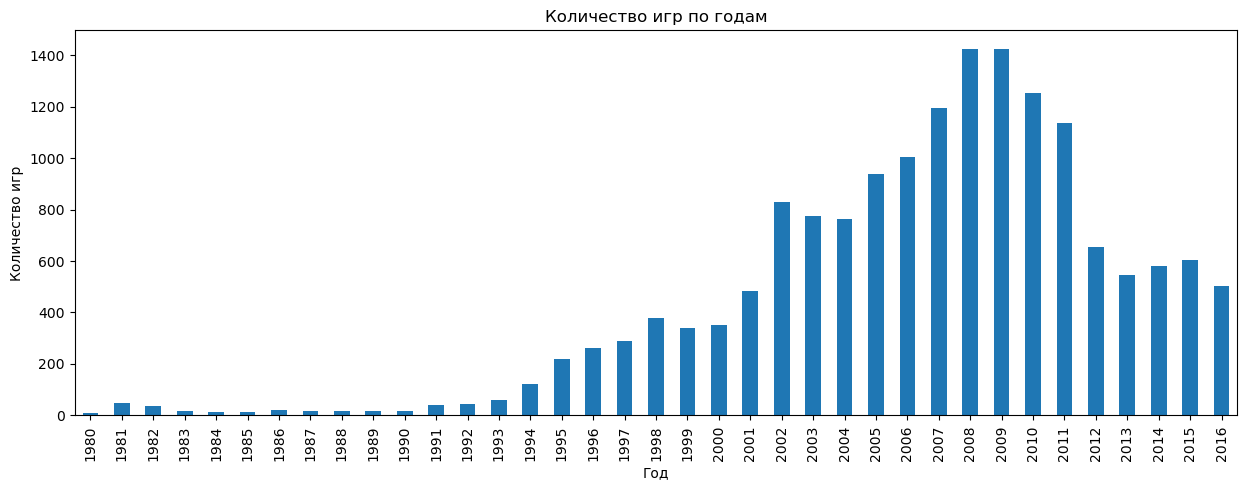

In [15]:
games.groupby('year_of_release')['year_of_release'].count().plot(
    kind='bar',
    figsize=(15,5),
    xlabel='Год',
    ylabel='Количество игр',
    title='Количество игр по годам'
)
None

Игр до начала `90-х` выпускалось очень мало. В 1990-х начался активный рост числа выпускаемых игр. `2000-е` - пиковый период по количеству игр с максимальным значением в `2008` году. Далее количество игр ежегодно начало сокращаться и с `2012` поддерживалось на уровне `~600` игр в год. Наиболее важным и информативным периодом можно считать 15-летний период с `2002 до 2016`. В целях `прогнозироавния` далее по проекту будут взяты данные за последние `3 года`.

### Изменение продаж по платформам 

Посмотрим на то, как менялись продажи по платформам по годам. Для этого построим `столбчатую диаграмму с накоплением`:

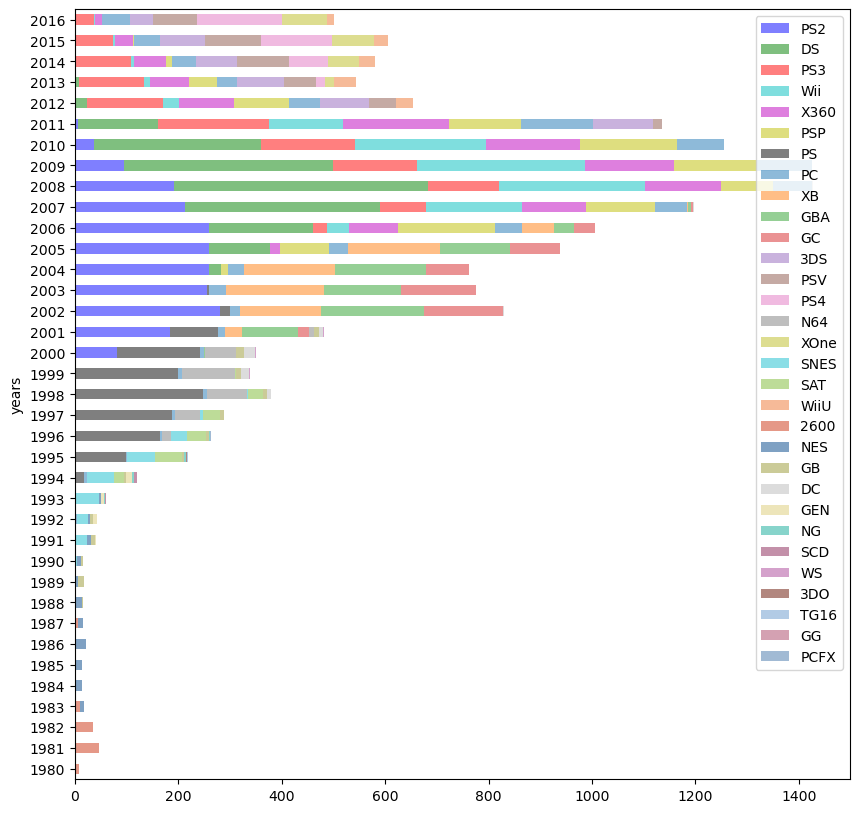

In [16]:
platforms = games.platform.value_counts().index
years = sorted(games[games['year_of_release'].isna()==False]['year_of_release'].unique())

platform_tuple = pd.DataFrame({'years':years})

for platform in platforms:
    platform_list = []
    for year in platform_tuple['years']:
         platform_list.append(len(games[(games['platform']==platform) & (games['year_of_release']==year)]))
    platform_tuple[platform] = platform_list

platform_df = platform_tuple.set_index('years')

colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k',
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#7DBB33', '#EE7733', '#CC3311', '#004488', '#999933',
    '#BBBBBB', '#DDCC77', '#11AA99', '#882255', '#AA4499',
    '#661100', '#6699CC', '#AA4466', '#4477AA', '#AA6611',
    '#3366CC', '#AA7700', '#EE3377', '#228855', '#CCBB44'
]

platform_df.plot.barh(stacked=True, alpha=0.5, figsize=(10,10), color = colors)
None

Можно заметить, как менялась структура рынка в части используемых в играх платформ. Так, в первой половине `1980-х` была популярна платформа `"2600" (Atari 2600)`, а во второй половине преобладал `"NES" (Nintendo Entertainment System)`. В `1990-х` на рынке начала преобладать приставка `"SNES" (Super Nintendo Entertainment System)`, замещая других игроков на рынке. Однако в `1994` на рынке появилась платформа `"PS" (PlayStation)`, которая со временем вытесняла с рынка `Nintendo`. Появлялись и новые игроки - например, `SAT (Sega Saturn)` или `PC (персональный компьютер)`. До `2001` года `PS` сохранял лидерство, вторым по количеству были приставки компании `Nintendo`. В `2001` году начала набирать популярность платформа `"XB" (Xbox)`, а в `2006` - `Wii`. Примечательно, что в `2007` году платформа от компании `Nintendo (Nintendo Dual Screen)` взяла опять лидерства. Однако выходили новые версии других платформ и начиная с `2011` рынок используемых для игр платформ был относительно равно поделен между платформами таких компаний, как `Sony` (PS2/PS3/PS4, PSP), `Xbox` и `Nintendo`.

Взглянем теперь на топ-5 платформ по суммарным продажам:

In [17]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

В топ входят такие платформы, как `'PS2'`, `'X360'`, `'PS3'`, `'Wii'`, `'DS'`. Построим распределения по годам для этих платформ:

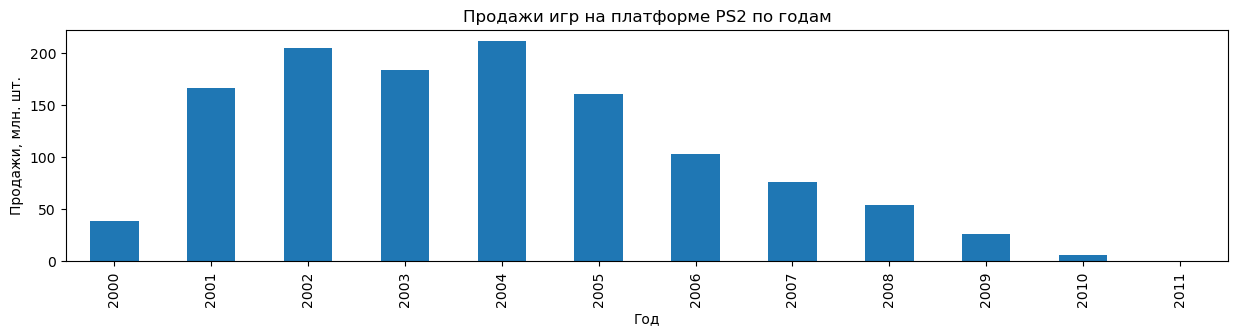

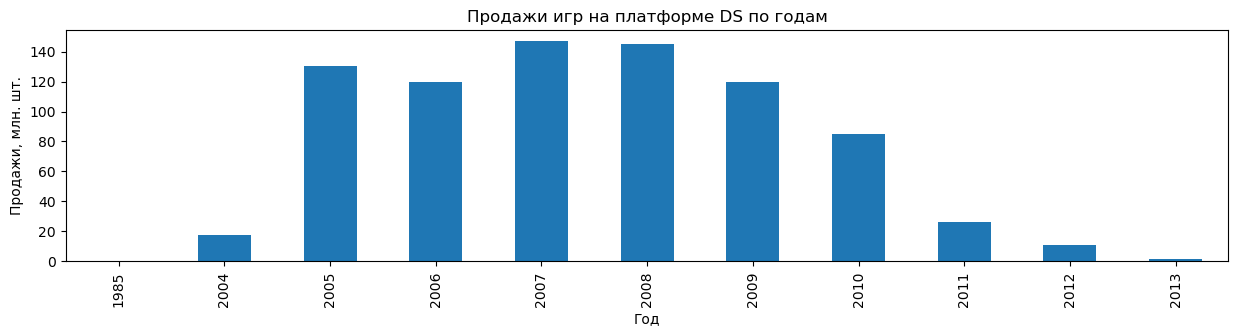

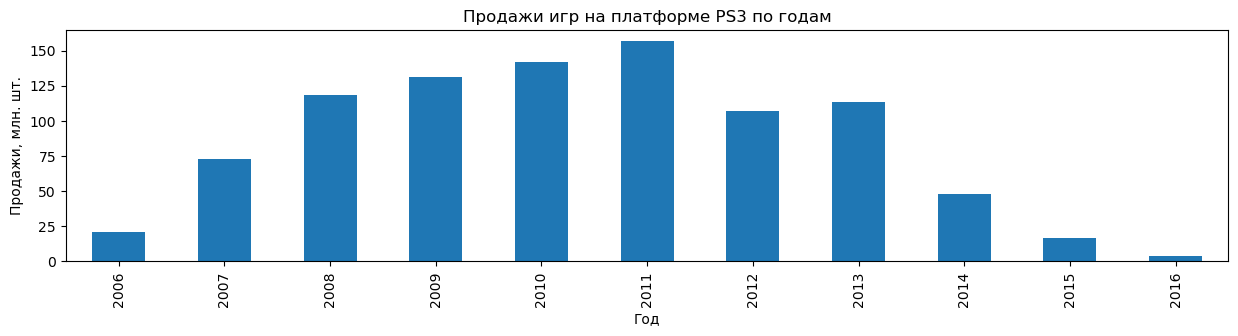

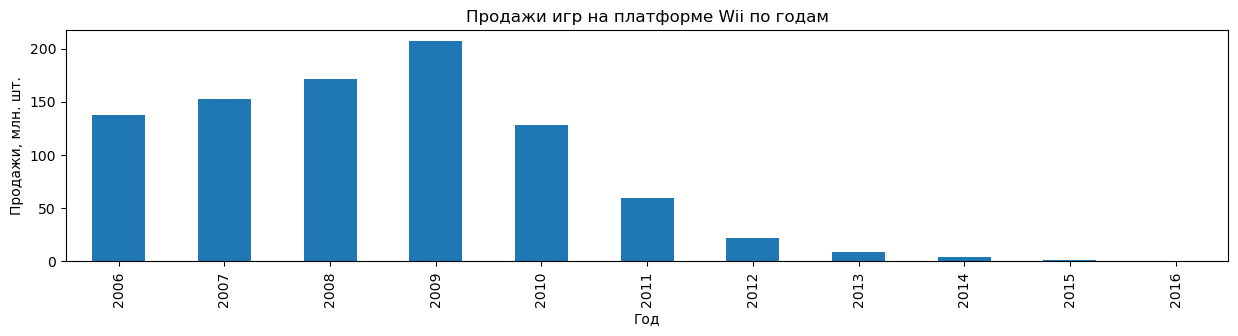

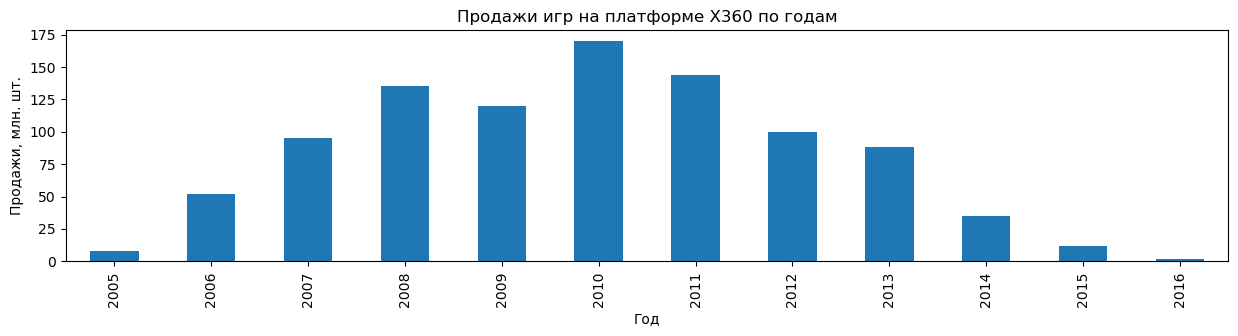

In [18]:
for platform in games.platform.value_counts().head().index:
    plt.show(
        games[games['platform']==platform].groupby('year_of_release')['total_sales'].sum().plot(
            kind='bar',
            figsize=(15,3),
            xlabel='Год',
            ylabel='Продажи, млн. шт.',
            title=f'Продажи игр на платформе {platform} по годам'
        )
    )

Можно заметить, что характерный срок в который исчезают старые платформы и появляются новые - `10 лет`.

### Платформы лидеры: тендентации и потенциал

Посмотрим, какие платформы за последние три года развивались и какие сейчас потенциально прибыльные.

Топ-10 платформ по продажам в 2014 году:


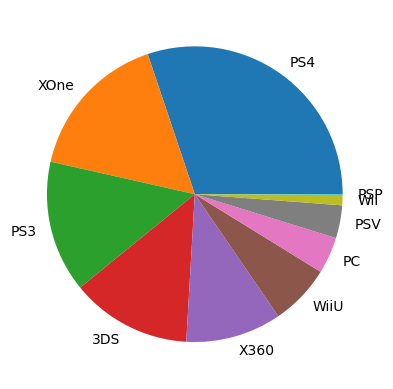


Топ-10 платформ по продажам в 2015 году:


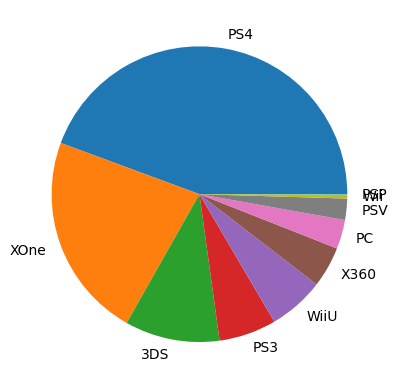


Топ-10 платформ по продажам в 2016 году:


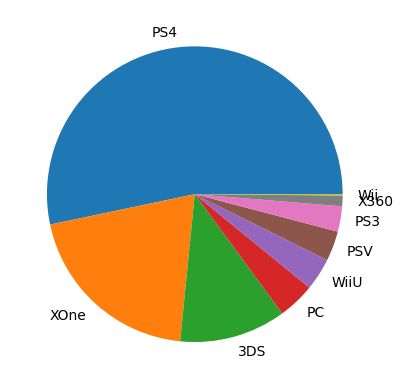

In [19]:
for year in range(2014,2017):
    print(f'Топ-10 платформ по продажам в {year} году:')
    fig1, ax1 = plt.subplots()
    ax1.pie(games[games['year_of_release']==year].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10), labels=games[games['year_of_release']==year].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index)
    plt.show()
    print()

Можно с уверенностью утверждать что платформы компаниий `Xbox Game Studios` (в частности, последняя модель `XOne`) и `Sony` (в частности, последняя модель `PS4`) - потенциально `прибыльные` с точки зрения продаж игр платформы. Данные платформы на протяжении последних `3 лет` уверенно занимают большие доли рынка. Примечательно, что это не единичные продукты, а серия различных моделей одной и той же платформы (приставки), что дает право полагать, что текущие и последующие линейки будут такими же успешными. Платформы Wii и PC занимаются примерно равные небольшие доли рынка. Неплохую долю рынка занимает платформа `3DS` от компании `Nintendo`, которая на протяжении последних `3 лет` занимает высокую позицию по уровню выпускаемых на ней игр и может так же рассматриваться как потенциально `прибыльная` платформа.

Для удобства далее занесем в переменную `games_relevant` данные, которые относятся к периоду с 2014 по 2016.

In [20]:
games_relevant = games[games['year_of_release'] >= 2014]
games_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


### Регионы лидеры

Посмотрим на сумму продаж по регионам:

In [21]:
print('Суммарные продажи игра в Северной Америке за последние 3 года:',
      games_relevant['na_sales'].sum())
print()
print('Суммарные продажи игра в Европе за последние 3 года:',
      round(games_relevant['eu_sales'].sum(), 2))
print()
print('Суммарные продажи игра в Японии за последние 3 года:',
      round(games_relevant['jp_sales'].sum(), 2))

Суммарные продажи игра в Северной Америке за последние 3 года: 284.06000000000006

Суммарные продажи игра в Европе за последние 3 года: 270.68

Суммарные продажи игра в Японии за последние 3 года: 93.09


Как можно заметить, рынок игр `Северной Америки` и `Европы`примерно в `3` раза больше, чем в `Японии`.

### Распределене глобальных продажам игр в разбивке по платформам

Построим соответствующие "ящики с усами" и опишем полученный результат:

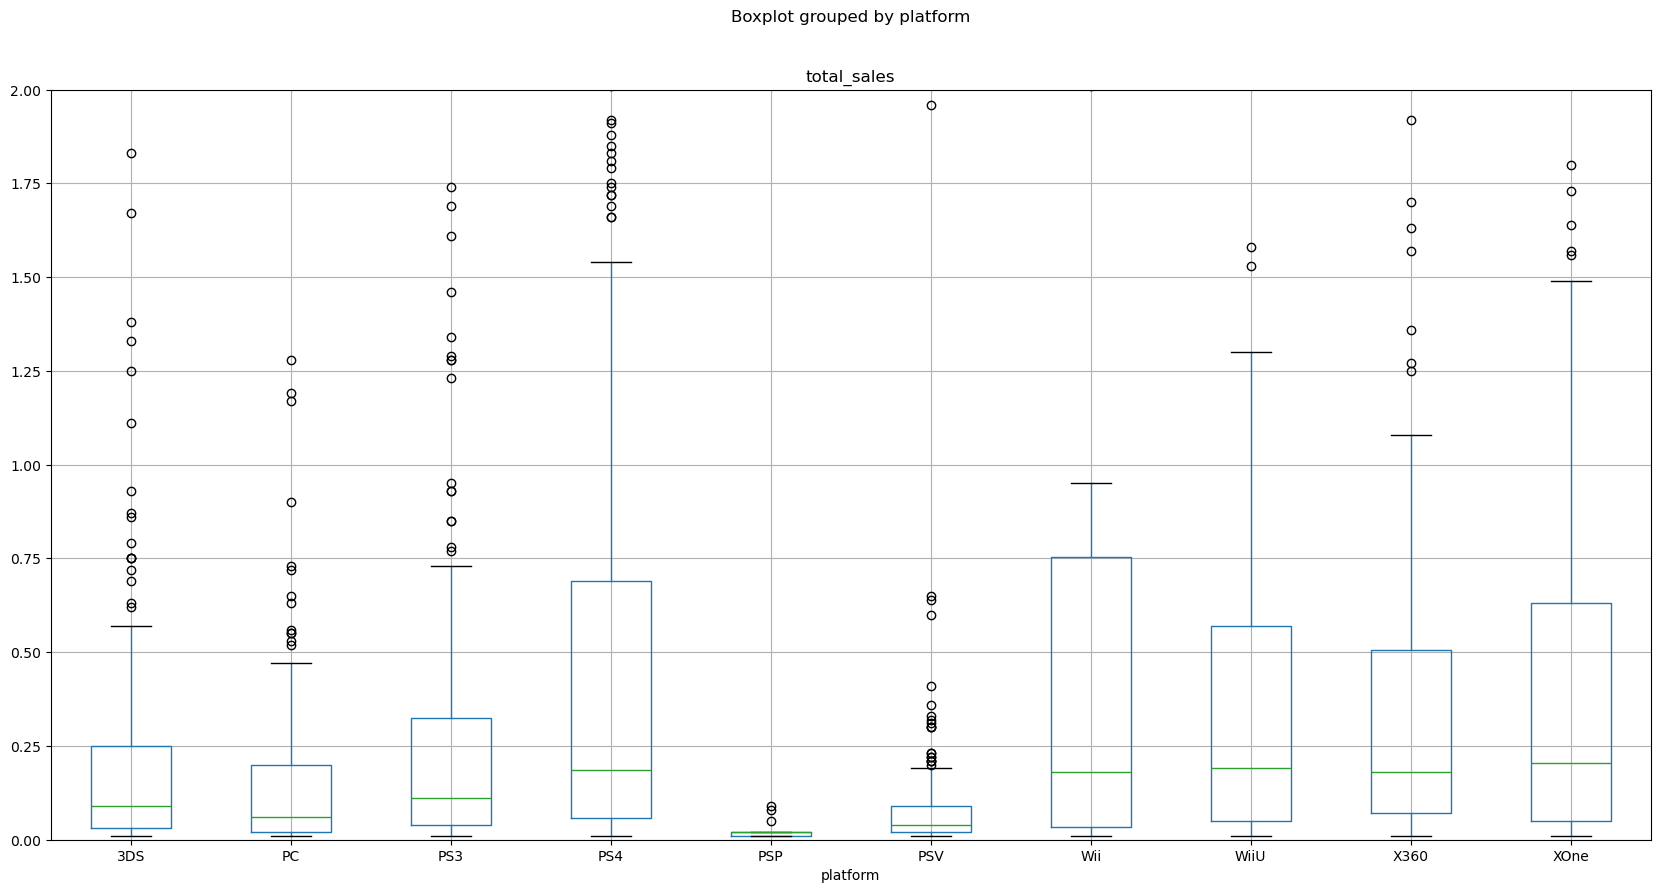

In [22]:
platforms_top_10 = list(games_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index)

ax = (games_relevant
      .query('platform in @platforms_top_10')
      .boxplot('total_sales', by='platform', figsize=(20, 10))
     )
ax.set_ylim(0, 2)
None

In [23]:
games_relevant.query('platform in @platforms_top_10').groupby('platform')['total_sales'].mean()

platform
3DS     0.408868
PC      0.179139
PS3     0.311324
PS4     0.766356
PSP     0.027692
PSV     0.075932
Wii     0.460909
WiiU    0.588767
X360    0.434414
XOne    0.615614
Name: total_sales, dtype: float64

Как можно заметить, данные по продажам игр имеют большие выбросы, из-за чего средние продажи сильно завышаются, поэтому необходимо ориентироваться на  `медианные значения`. В медианном плане игры за последние три года продавались в количестве до `250 тыс. копий`. Лидеры - `PS4`, `XOne`, `WiiU`. Выбросы же в продажах некоторых игр доходят до десятков миллионов. Так, на `Xbox`  одна из игр была продана в количество `20 миллионов` копий, на платформе `DS` - более `26 миллионов`, а на платформе `Wii` - более `70 миллионов`.

### Корреляция между отзывами пользователей и критиков и продажами игр

Взглянем, как влияют `отзывы` пользователей и критиков на `продажи` внутри одной из популярных платформ - `PS4`. Для этого построем `диаграмму рассеяния` и посчитаем `корреляцию` между отзывами и продажами:

0.4026614106810409


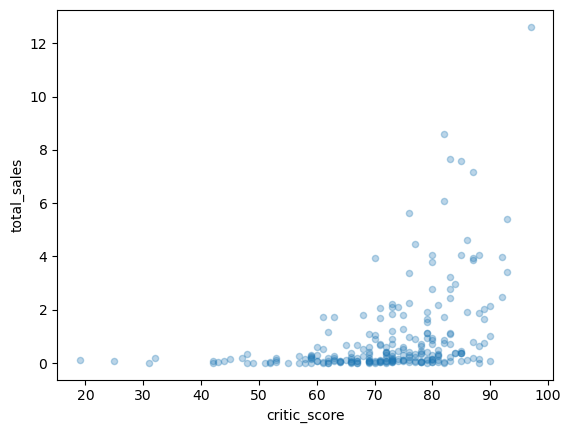

In [24]:
print(
    games_relevant[games_relevant['platform'] == 'PS4']['critic_score'].corr(
    games_relevant[games_relevant['platform'] == 'PS4']['total_sales']
)
)

games_relevant[games_relevant['platform'] == 'PS4'][['critic_score', 'total_sales']].plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.3
)
None

-0.04013158947269733


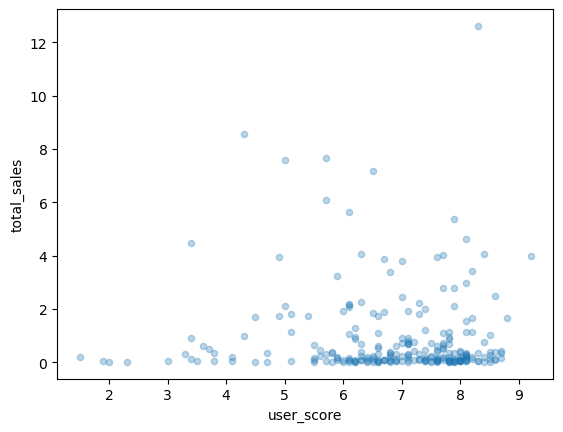

In [25]:
print(
    games_relevant[games_relevant['platform'] == 'PS4']['user_score'].corr(
    games_relevant[games_relevant['platform'] == 'PS4']['total_sales']
)
)

games_relevant[games_relevant['platform'] == 'PS4'][['user_score', 'total_sales']].plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.3
)
None

Между отзывами критиков и продажами присутствует `умеренная положительная` корреляция. Корреляции продаж и отзывов пользователей `не наблюдается`.

Посмотрим на корреляцию на других платформах:

In [26]:
print('Корреляция с отзывавми критиков:')
print('X360:',
    games_relevant[games_relevant['platform'] == 'X360']['critic_score'].corr(
    games_relevant[games_relevant['platform'] == 'X360']['total_sales']
)
)
print('PS3:',
    games_relevant[games_relevant['platform'] == 'PS3']['critic_score'].corr(
    games_relevant[games_relevant['platform'] == 'PS3']['total_sales']
)
)
print('3DS:',
    games_relevant[games_relevant['platform'] == '3DS']['critic_score'].corr(
    games_relevant[games_relevant['platform'] == '3DS']['total_sales']
)
)
print()
print('Корреляция с отзывавми пользователей:')
print('X360:',
    games_relevant[games_relevant['platform'] == 'X360']['user_score'].corr(
    games_relevant[games_relevant['platform'] == 'X360']['total_sales']
)
)
print('PS3:',
    games_relevant[games_relevant['platform'] == 'PS3']['user_score'].corr(
    games_relevant[games_relevant['platform'] == 'PS3']['total_sales']
)
)
print('3DS:',
    games_relevant[games_relevant['platform'] == '3DS']['user_score'].corr(
    games_relevant[games_relevant['platform'] == '3DS']['total_sales']
)
)

Корреляция с отзывавми критиков:
X360: 0.5257228356581523
PS3: 0.44657460493190704
3DS: 0.314117492869051

Корреляция с отзывавми пользователей:
X360: -0.138444570945665
PS3: -0.16676141347662118
3DS: 0.2151932718527028


Как можно заметить, по другим платформам также наблюдается умеренная корреляция продаж с отзывами критиков и слабая коррелция с оценкой пользователей. Можно заключить, что к критикиам прислушиваются больше.

### Прибыльные жанры игр

Посмотрим на общее распределение игр по жанрам в контексте их продаж:

In [27]:
games_relevant.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc = ['sum', 'mean', 'median']
).sort_values(by=[('median', 'total_sales')], ascending=False)

,sum,mean,median
,total_sales,total_sales,total_sales
genre,,,
Shooter,170.94,1.335469,0.515
Sports,109.48,0.680000,0.180
Platform,18.09,0.476053,0.140
Fighting,28.22,0.470333,0.125
Role-Playing,101.44,0.459005,0.110
Simulation,13.13,0.298409,0.100
Action,199.36,0.322068,0.090
Misc,37.55,0.332301,0.090


Построим для наглядности столбчатую диаграмму и ящики с усами:

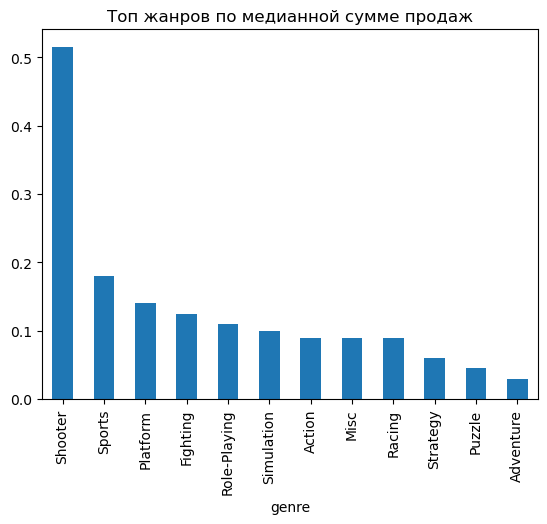

In [28]:
# bar
games_relevant.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc = ['sum', 'mean', 'median']
).sort_values(by=[('median', 'total_sales')], ascending=False)[('median', 'total_sales')].plot(kind='bar', title='Топ жанров по медианной сумме продаж')
None

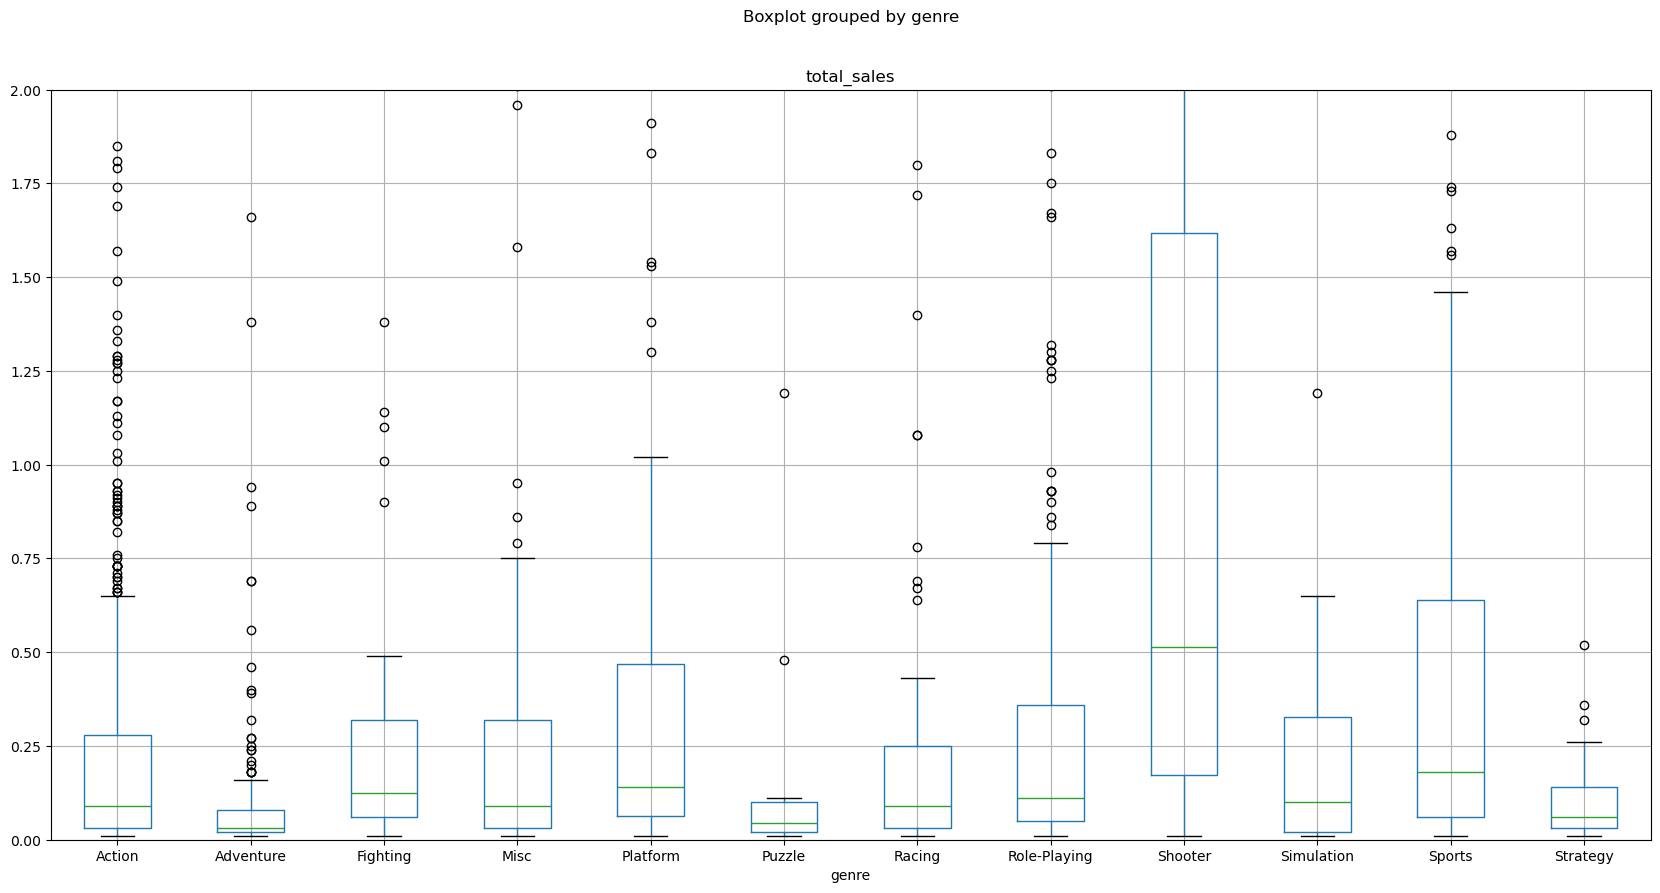

In [29]:
# boxplot
ax = games_relevant.boxplot('total_sales', by='genre', figsize=(20, 10))
ax.set_ylim(0, 2)
None

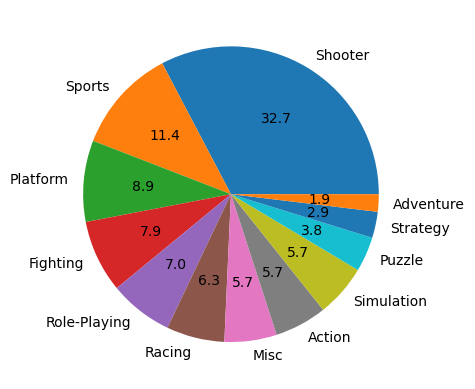

In [30]:
fig2, ax2 = plt.subplots()
ax2.pie(games_relevant.groupby('genre')['total_sales'].median().sort_values(ascending=False), labels=games_relevant.groupby('genre')['total_sales'].mean().sort_values(ascending=False).index, autopct='%.1f')
plt.show()

Исходя из данных, можно выделить `прибыльные` жанры - `Shooter`, `Sports`. Другими менее популярными, но при этом стабильно продающимеся жанрами являются `Platform`и `Fighting`. Жанр `Action` имеет наибольшие суммарные продажи, однако медианное значение у игр этого жанра маленькие. Это вызвано тем, что как правило игры этого жанра продаются немного, однако есть некоторые, которые имеют очень большие продажи. Наименее жн `низкие продажи` у игр с жанром `Strategy`, `Puzzle` и `Adventure`.

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**  

  
Исследовательский анализ данных показал, что:
- Игр до начала `1990-х` выпускалось очень `мало`, период роста начался с `2001` года, `пик` - `2008/2009` года;
- Структура рынка в части используемых в играх платформ активно менялась. В итоге, рынок был  поделен между платформами компаний `Sony`, `Xbox` и `Nintendo`;
- В топ по продажам входят такие платформы, как 'PS2', 'DS', 'PS3', 'Wii', 'X360';
- Характерный срок в который исчезают старые платформы и появляются новые - `10 лет`;
- В медиане игры продавались в количестве до `250 тыс. копий`, при это по каждой из платформ есть `много выбросов`; 
- Между отзывами критиков и продажами присутствует `умеренная положительная` корреляция. Корреляции продаж и отзывов пользователей `не наблюдается`;
- Прибыльные жанры - `Sports` и `Shooter`, малоприбыльные - `Strategy`, `Puzzle` и `Adventure`.
</div>

## Портрет пользователя каждого региона <a id='5'></a>

### Популярные платформы для пользователя каждого региона

Посмотрим на популярные платформы в зависимости от региона (NA, EU, JP):

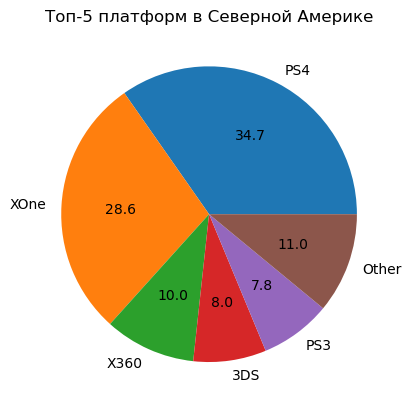

In [31]:
#top platforms in NA
top_5_platform_na = pd.DataFrame(games_relevant.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())

others_sum = games_relevant.groupby('platform')['na_sales'].sum().sort_values(ascending=False).tail(5).sum()

others_platform_na = pd.DataFrame([others_sum])
others_platform_na.columns = ['na_sales']
others_platform_na.index = ['Other']

top_5_platform = pd.concat([top_5_platform_na, others_platform_na])

fig5, ax5 = plt.subplots()
ax5.pie(
    top_5_platform['na_sales'],
    labels=top_5_platform.index,
    autopct='%.1f'
       )

plt.title("Топ-5 платформ в Северной Америке")
plt.show()

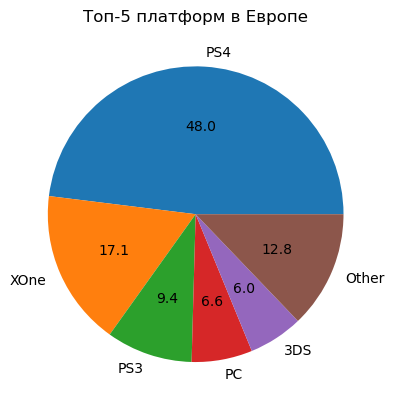

In [32]:
#top 5 platforms in EU
top_5_platform_eu = pd.DataFrame(games_relevant.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head())

others_sum = games_relevant.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).tail(5).sum()

others_platform_eu = pd.DataFrame([others_sum])
others_platform_eu.columns = ['eu_sales']
others_platform_eu.index = ['Other']

top_5_platform = pd.concat([top_5_platform_eu, others_platform_eu])

fig5, ax5 = plt.subplots()
ax5.pie(
    top_5_platform['eu_sales'],
    labels=top_5_platform.index,
    autopct='%.1f'
       )

plt.title("Топ-5 платформ в Европе")
plt.show()

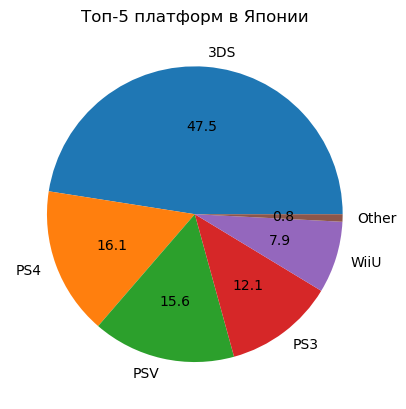

In [33]:
#top 5 platforms in JP
top_5_platform_jp = pd.DataFrame(games_relevant.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head())

others_sum = games_relevant.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).tail(5).sum()

others_platform_jp = pd.DataFrame([others_sum])
others_platform_jp.columns = ['jp_sales']
others_platform_jp.index = ['Other']

top_5_platform = pd.concat([top_5_platform_jp, others_platform_jp])

fig5, ax5 = plt.subplots()
ax5.pie(
    top_5_platform['jp_sales'],
    labels=top_5_platform.index,
    autopct='%.1f'
       )

plt.title("Топ-5 платформ в Японии")
plt.show()

В `Северной Америке` относительно одинаковы по популярности платформы - `PS4` и `XOne`. В `Европе` предпочтения чаще  отдают платформам компании `Sony` - `PS4` и `PS3`, однако `XOne` также распространен. В `Японии` же наиболее популярной можно считать платформу `Nintendo` - `3DS`, но часто используют и платформы `Sony`: `PS4`, `PS3` и `PSV`.

### Популярные жанры для пользователя каждого региона

Взглянем теперь на популярные жанры:

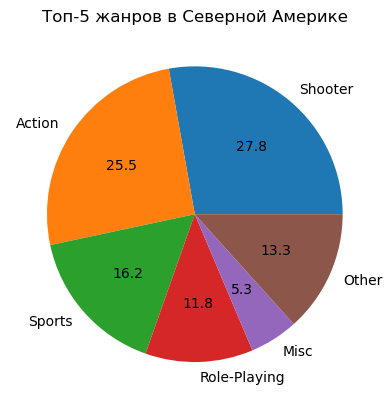

In [34]:
#top genres in NA
top_5_genres_na = pd.DataFrame(games_relevant.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())

others_sum = games_relevant.groupby('genre')['na_sales'].sum().sort_values(ascending=False).tail(7).sum()

others_genres_na = pd.DataFrame([others_sum])
others_genres_na.columns = ['na_sales']

top_5_genres = pd.concat([top_5_genres_na, others_genres_na])
top_5_genres.index = ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc', 'Other']


fig4, ax4 = plt.subplots()
ax4.pie(top_5_genres['na_sales'],
        labels=top_5_genres.index,
        autopct='%.1f')
plt.title("Топ-5 жанров в Северной Америке")
plt.show()

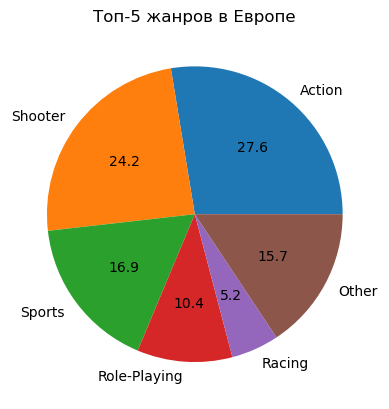

In [35]:
#top genres in EU
top_5_genres_eu = pd.DataFrame(games_relevant.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head())

others_sum = games_relevant.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).tail(7).sum()

others_genres_eu = pd.DataFrame([others_sum])
others_genres_eu.columns = ['eu_sales']
others_genres_eu.index = ['Other']

top_5_genres = pd.concat([top_5_genres_eu, others_genres_eu])

fig5, ax5 = plt.subplots()
ax5.pie(
    top_5_genres['eu_sales'],
    labels=top_5_genres.index,
    autopct='%.1f'
       )

plt.title("Топ-5 жанров в Европе")
plt.show()

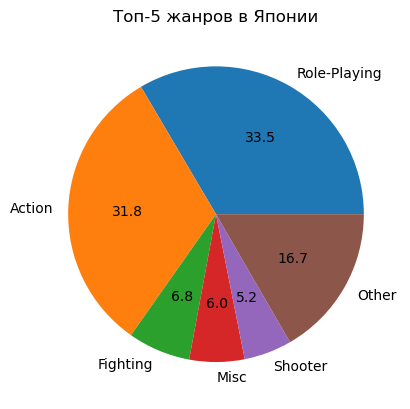

In [36]:
#top genres in JP
top_5_genres_jp = pd.DataFrame(games_relevant.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head())

others_sum = games_relevant.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).tail(7).sum()

others_genres_jp = pd.DataFrame([others_sum])
others_genres_jp.columns = ['jp_sales']
others_genres_jp.index = ['Other']

top_5_genres = pd.concat([top_5_genres_jp, others_genres_jp])

fig6, ax6 = plt.subplots()
ax6.pie(
    top_5_genres['jp_sales'],
    labels=top_5_genres.index,
    autopct='%.1f'
       )

plt.title("Топ-5 жанров в Японии")
plt.show()

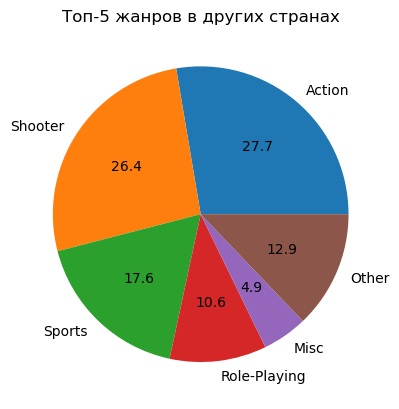

In [37]:
#top genres in other countries
top_5_genres_other = pd.DataFrame(games_relevant.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head())

others_sum = games_relevant.groupby('genre')['other_sales'].sum().sort_values(ascending=False).tail(7).sum()

others_genres_other = pd.DataFrame([others_sum])
others_genres_other.columns = ['other_sales']
others_genres_other.index = ['Other']

top_5_genres = pd.concat([top_5_genres_other, others_genres_other])

fig7, ax7 = plt.subplots()
ax7.pie(
    top_5_genres['other_sales'],
    labels=top_5_genres.index,
    autopct='%.1f'
       )

plt.title("Топ-5 жанров в других странах")
plt.show()

Популярные жанры в Северной Америке, Европе и других странах - `Shooter`, `Action` и `Sports`.  
В Японии лидерами среди жанров являются `Role-Playing`, `Action` и `Fighting`.

### Влияние рейтинга ESRB

Посмотрим далее, влияет ли рейтинг ESRB на продажи в каждом из регионов:

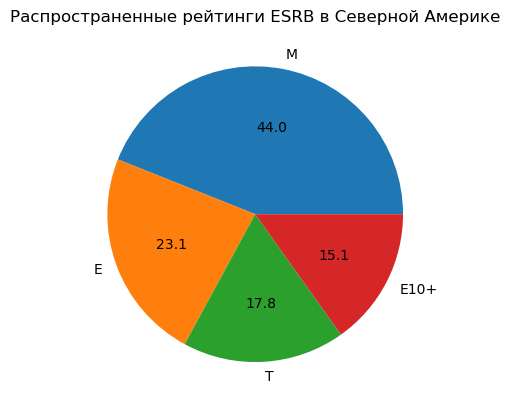

In [38]:
#ESRB impact in NA
fig, ax = plt.subplots()
ax.pie(
    games_relevant.groupby('rating')['na_sales'].sum().sort_values(ascending=False),
    labels=games_relevant.groupby('rating')['na_sales'].sum().sort_values(ascending=False).index,
    autopct='%.1f'
)
plt.title('Распространенные рейтинги ESRB в Северной Америке')
plt.show()

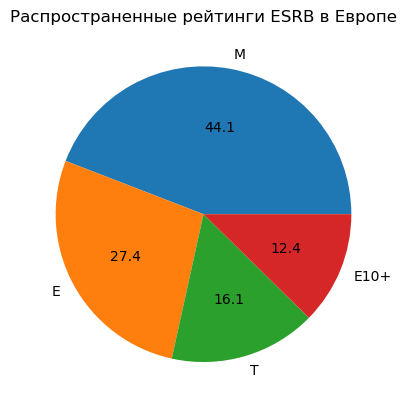

In [39]:
# ESRB impact in EU
fig, ax = plt.subplots()
ax.pie(
    games_relevant.groupby('rating')['eu_sales'].sum().sort_values(ascending=False),
    labels=games_relevant.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).index,
    autopct='%.1f'
)
plt.title('Распространенные рейтинги ESRB в Европе')
plt.show()

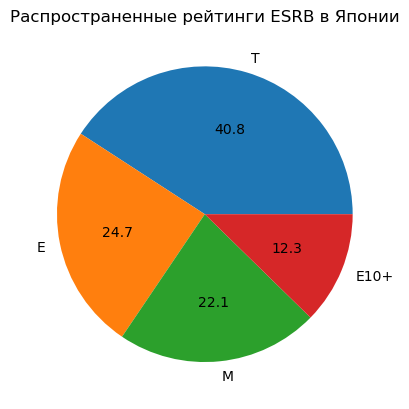

In [40]:
# ESRB impact in JP
fig, ax = plt.subplots()
ax.pie(
    games_relevant.groupby('rating')['jp_sales'].sum().sort_values(ascending=False),
    labels=games_relevant.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).index,
    autopct='%.1f'
)
plt.title('Распространенные рейтинги ESRB в Японии')
plt.show()

В `Северной Америке` и `Европе` игры с рейтингом  `M` (игры для лиц старше 17 лет) имеют наибольшый оборот. С большим отрывом далее расположились игры с таким рейтингом как `T` (игры для лиц старше 13 лет) и `E` (для всех возрастных групп).

В `Японии` ситуация отличаются - наибольшие продажи имеют игры с `T`. Далее по популярности идут `E` и `M`.

Можно заключить, что в Японии рейтинг ESRB чуть больше `влияет` на продажи - игры с большим возрастным цензом мало продаются, в то время как в Европе и Северной Америке данное возрастное ограничение `не сильно влияет` на продажи, игры относительно взрослых по-прежнему продаются больше других.

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**  

- Типичный пользователь из `Северной Америки`: используют `XOne` или `PS4`, играет преимущественно в `шутеры` или `экшн`. Возрастные ограничения на игры `не влияют` на предпочтения. Как правило, игры для людей `старше 17 лет`.
- Типичный пользователь из `Европы`: используют `PS4`, играет преимущественно 'шутеры'. Возрастные ограничения на игры `не влияют` на предпочтения. Как правило, игры для людей `старше 17 лет`.
- Типичный пользователь из `Японии`: использует `3DS`, играет в `ролевые` игры. Возрастные ограничения на игры `играют роль` при выборе игре. Как правило, игры для людей старше 13 лет.
</div>

## Проверка гипотез <a id='6'></a>

### Гипотеза о равенстве средних пользовательских рейтингов для платформ XOne и PC

**Нулевая гипотеза (H0)**: средняя оценка пользователей для игр на платформе `XOne` *равна* средней оценке пользователей для игр на платформе `PC`

**Альтернативная гипотеза (H1)**: средняя оценка пользователей для игр на платформе `XOne` *не равна* средней оценке пользователей для игр на платформе `PC`

Здесь и далее установим `уровень статистической значимости`, равный **0.01**. Если p-value окажется меньше него, то отвергнем H0

In [41]:
alpha = .01

results = st.ttest_ind(
    games_relevant[(games_relevant['platform'] == 'XOne') & (games_relevant['user_score'].isna() == False)]['user_score'],
    games_relevant[(games_relevant['platform'] == 'PC') & (games_relevant['user_score'].isna() == False)]['user_score'],
    alternative='two-sided'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.10450507919348415
Не отвергаем нулевую гипотезу


Статистический тест, показал, что нет оснований отвергнуть нулевую гипотезу, а значит полагать, что средние двух генеральных совокупностей равны.

 Посчитаем данные статистики, чтобы убедиться в этом:

In [42]:
games_relevant[(games_relevant['platform'] == 'XOne') & (games_relevant['user_score'].isna() == False)]['user_score'].mean()

6.594545454545456

In [43]:
games_relevant[(games_relevant['platform'] == 'PC') & (games_relevant['user_score'].isna() == False)]['user_score'].mean()

6.298360655737705

Как можно заметить, оценки пользователй платформы `PC` равны `XOne`

### Гипотеза о равенстве средних пользовательских рейтингов для игр жанра "Action" и "Sports"

**Нулевая гипотеза (H0)**: средняя оценка пользователей для игр жанра `Action` *равна* средней оценке пользователей для игр жанра `Sports`

**Альтернативная гипотеза (H1)**: средняя оценка пользователей для игр жанра `Action` *не равна* средней оценке пользователей для игр жанра `Sports`

In [44]:
alpha = .01

results = st.ttest_ind(
    games_relevant[(games_relevant['genre'] == 'Action') & (games_relevant['user_score'].isna() == False)]['user_score'],
    games_relevant[(games_relevant['genre'] == 'Sports') & (games_relevant['user_score'].isna() == False)]['user_score'],
    alternative='two-sided'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу в пользу альтернативной


Статистический тест показал, что есть основания отвергнуть нулевую гипотезу в пользу альтернатвной - оценки пользователей для этих двух жанров нельзя считать равными.

Убедимся в этом ниже, посчитав средние значения данных генеральных совокупностей:

In [45]:
games_relevant[(games_relevant['genre'] == 'Action') & (games_relevant['user_score'].isna() == False)]['user_score'].mean()

6.760606060606061

In [46]:
games_relevant[(games_relevant['genre'] == 'Sports') & (games_relevant['user_score'].isna() == False)]['user_score'].mean()

5.2251968503937

Оценки на самом деле оказались достаточно разными.

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**

- Средние генеральных совокупностей *"оценки пользователей для игр на платформе `XOne`"* и *"оценки пользователей для игр на платформе `PC`"* равны;
- Оценки пользователей для жанров `Action` и `Sports`  нельзя считать равными.
    
</div>

## Вывод <a id='7'></a>

В исследовании анализировались данные интернет-магазина "Стримчик" о продажах игр с *целью вывления ключевых факторов, влияющих на успешность игр, и определения зон роста интернет-магазина для развития будущих продаж*.

**Перед началом исследования данные были обработаны:**
- названия столбцов приведены к "змеиному" регистру;
- удалены 2 строчки с пропусками в столбцах `name` и `genre`. В столбцах `year_of_release`, `critic_score`, `user_score`, `rating` пропуски представлены в большом количестве - их удалению привело бы к искажению результатов исследования;
- тип данных в столбцах `user_score` и `year_of_release` был скорректирован;
- добавен столбец с суммарными продажами во всех регионах.


**В результате анализа данных было выявлено:**

- Рынок игровых платформа на протяжении всего времени менял свою структуру - уходили и приходили новые игроки и новые версии платформ. На текущий момент рынок платформ  поделен между приставками от компаний `Sony (PS4, PS3)`, `Xbox (X360, XOne)` и `Nintendo (DS, Wii)`;
- Доля продаж от общего числа продаж из данных за последние `3 года` в зависимости от региона разная: в `Северной Америке` и `Европе` - по `~42%`, В `Японии` - `~15%`;
- Прибыльные жанры - `Shooter` и `Sports`, малоприбыльные - `Strategy`, `Puzzle` и `Adventure`;
- Жанр игр влияет на успешность игр с учетом региона: в `Северной Америке` и `Европе` популярны `шутеры` (`220 тыс. копий` на игру по медиане), в `Японии` - `ролевые игры` (`50 тыс. копий` на игру по медиане);
- Между отзывами критиков и продажами присутствует `умеренная положительная` корреляция (`0.4`). Корреляции продаж и отзывов пользователей `не наблюдается` (`-0.04`);
- Пользователи в среднем одинаково оценивают игры на платформе `XOne` и `PC`
- Оценки пользователей для жанров `Action` и `Sports` можно считать разными.

**Рекомендации для интернет-магазина "Стримчик":**
- При продаже игр в Северную Америку или Европу необходимо ориентироваться на популярные там платформы `XOne` (NA) и PS4 (EU, NA) соответственно, при продаже в Японию - на `3DS`
- Учитывать портрет пользователя и его регион при выпуске игр: для `Северной Америки` и `Европы` релевантен жанр `шутеры`, для `Японии` - `ролевые игры`.
- Не придавать большого внимания `оценкам критиков`, но при необходимости ориентироваться на них.